### 論文圖 - Precision-Recall Curves

C:\Users\aaron\AppData\Local\Temp\ipykernel_23620\1051281434.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_map = cm.get_cmap('Set3', 12)


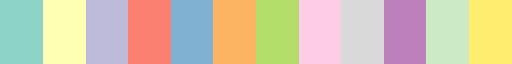

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

output_folder = 'img/proposal'
os.makedirs(output_folder, exist_ok=True)

from matplotlib import cm
colors_map = cm.get_cmap('Set3', 12)
colors_map

In [16]:
def precision_recall_curve_plot(df, colors, hue, path=None):
    fig = plt.figure(figsize=(10, 5), layout="constrained")
    spec = fig.add_gridspec(1, 2)

    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = fig.add_subplot(spec[0, 1])


    for i, phase in enumerate(df[hue].unique()):
        df_phase = df[df[hue] == phase]

        PrecisionRecallDisplay.from_predictions(df_phase['Label_idx'], df_phase['Output(prob)'], ax=ax1, name=phase, color=colors[i])
        RocCurveDisplay.from_predictions(df_phase['Label_idx'], df_phase['Output(prob)'], ax=ax2, name=phase, color=colors[i])

    PrecisionRecallDisplay.from_predictions(df['Label_idx'], [0.1]*df.shape[0], ax=ax1, name='null', color='red')
    RocCurveDisplay.from_predictions(df['Label_idx'], [0.6]*df.shape[0], ax=ax2, name='null',  color='red')

    ax1.title.set_text('Precision-Recall curve')
    ax2.title.set_text('ROC curve')

    if path:
        plt.savefig(path)
    else:
        plt.show()

#### hyperparameters - lr

In [18]:
df_lr1 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.01_Hs300_Hl1\pred_and_label.csv')
df_lr2 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs300_Hl2\pred_and_label.csv')
df_lr3 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.0001_Hs300_Hl3\pred_and_label.csv')

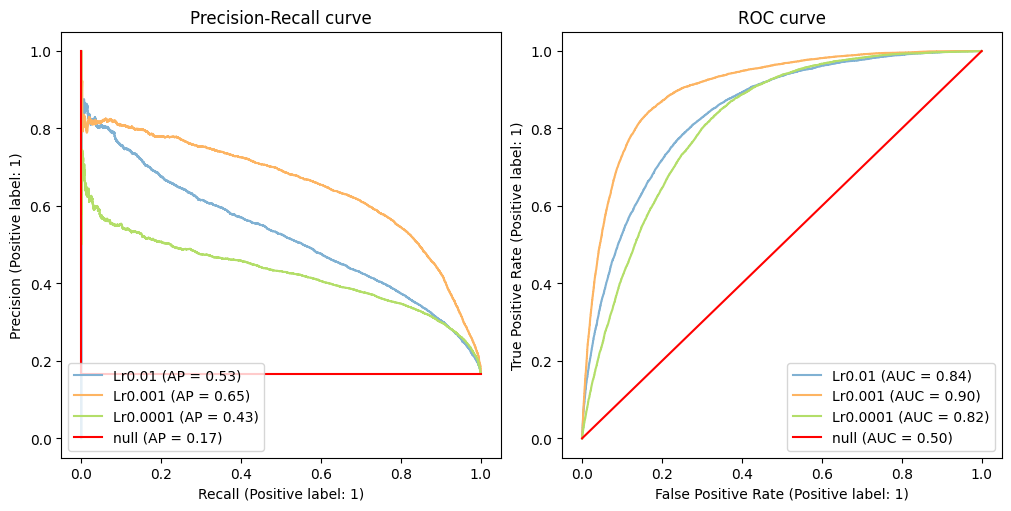

In [24]:
df_lr1 = df_lr1[df_lr1['Phase'] == 'test']
df_lr1.loc[:,'gp']= 'Lr0.01'
df_lr2 = df_lr2[df_lr2['Phase'] == 'test']
df_lr2.loc[:,'gp'] = 'Lr0.001'
df_lr3 = df_lr3[df_lr3['Phase'] == 'test']
df_lr3.loc[:,'gp'] = 'Lr0.0001'

df_all = pd.concat([df_lr1, df_lr2, df_lr3])
precision_recall_curve_plot(df_all, colors_map.colors[[4, 5, 6]], hue='gp', 
                            path=f'{output_folder}/hyperparameters - lr.png')

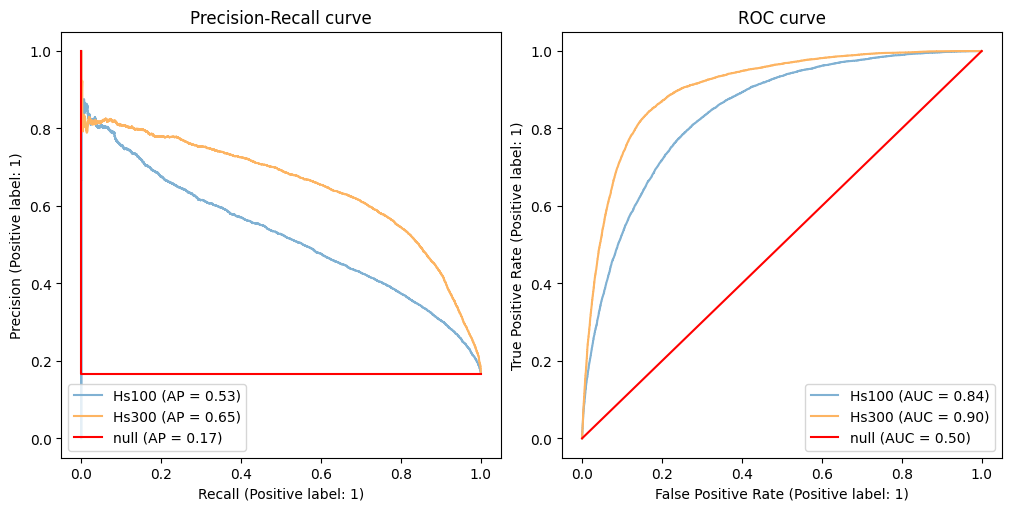

In [23]:
df_lr1 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs100_Hl2\pred_and_label.csv')
df_lr2 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs300_Hl2\pred_and_label.csv')

df_lr1 = df_lr1[df_lr1['Phase'] == 'test']
df_lr1.loc[:,'gp']= 'Hs100'
df_lr2 = df_lr2[df_lr2['Phase'] == 'test']
df_lr2.loc[:,'gp'] = 'Hs300'


df_all = pd.concat([df_lr1, df_lr2])
df_all

precision_recall_curve_plot(df_all, colors_map.colors[[4, 5, 6]], hue='gp', 
                            path=f'{output_folder}/hyperparameters - hs.png')

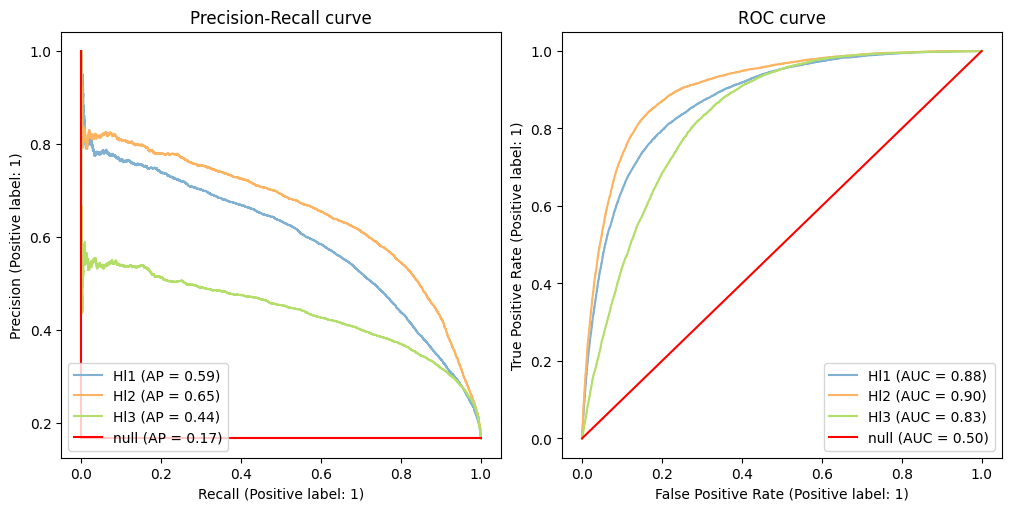

In [25]:
df_lr1 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs300_Hl1\pred_and_label.csv')
df_lr2 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs300_Hl2\pred_and_label.csv')
df_lr3 = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs300_Hl3\pred_and_label.csv')

df_lr1 = df_lr1[df_lr1['Phase'] == 'test']
df_lr1.loc[:,'gp']= 'Hl1'
df_lr2 = df_lr2[df_lr2['Phase'] == 'test']
df_lr2.loc[:,'gp'] = 'Hl2'
df_lr3 = df_lr3[df_lr3['Phase'] == 'test']
df_lr3.loc[:,'gp'] = 'Hl3'

df_all = pd.concat([df_lr1, df_lr2, df_lr3])
df_all

precision_recall_curve_plot(df_all, colors_map.colors[[4, 5, 6]], hue='gp', 
                            path=f'{output_folder}/hyperparameters - hl.png')

#### anchor size

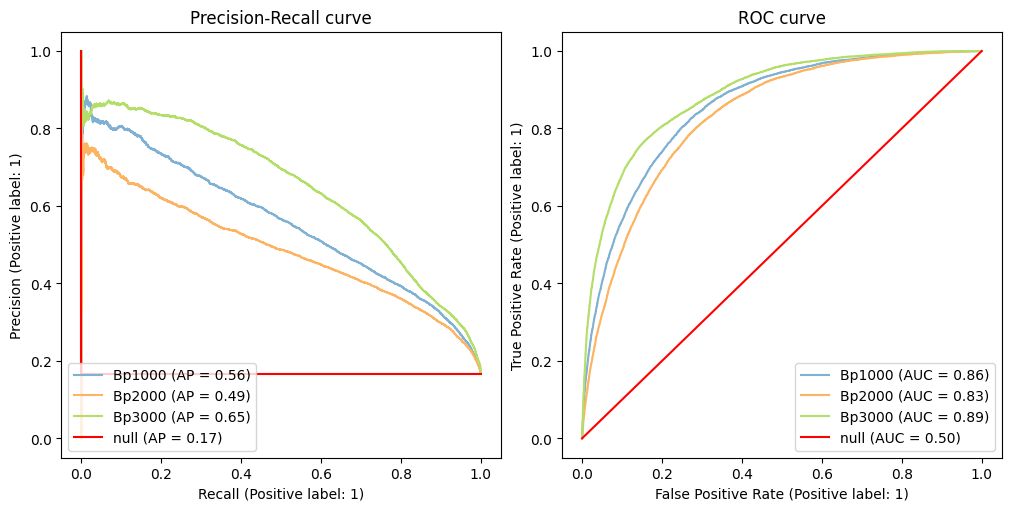

In [26]:
df_1 = pd.read_csv(r'..\output\GM12878_CTCF\2024.01.16_cnn-bp-range_hyper-test\bp1000.50ms_Lr0.001_Hs100_CHs200_Hl2_Bp1000\pred_and_label.csv')
df_2 = pd.read_csv(r'..\output\GM12878_CTCF\2024.01.16_cnn-bp-range_hyper-test\bp2000.50ms_Lr0.001_Hs100_CHs100_Hl2_Bp2000\pred_and_label.csv')
df_3 = pd.read_csv(r'..\output\GM12878_CTCF\2024.01.16_cnn-bp-range_hyper-test\bp3000.50ms_Lr0.001_Hs100_CHs200_Hl2_Bp3000\pred_and_label.csv')

df_1 = df_1[df_1['Phase'] == 'test']
df_1.loc[:,'gp']= 'Bp1000'
df_2 = df_2[df_2['Phase'] == 'test']
df_2.loc[:,'gp'] = 'Bp2000'
df_3 = df_3[df_3['Phase'] == 'test']
df_3.loc[:,'gp'] = 'Bp3000'

df_all = pd.concat([df_1, df_2, df_3])
df_all

precision_recall_curve_plot(df_all, colors_map.colors[[4, 5, 6]], hue='gp', 
                            path=f'{output_folder}/anchor size.png')

### 保留


In [9]:

df_best = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.001_Hs100_Hl2\pred_and_label.csv')
df_bad = pd.read_csv(r'..\output\GM12878_CTCF\2023.11.22_cnn-extracter_hyper-test\3000bp.50ms_Lr0.01_Hs100_Hl3\pred_and_label.csv')

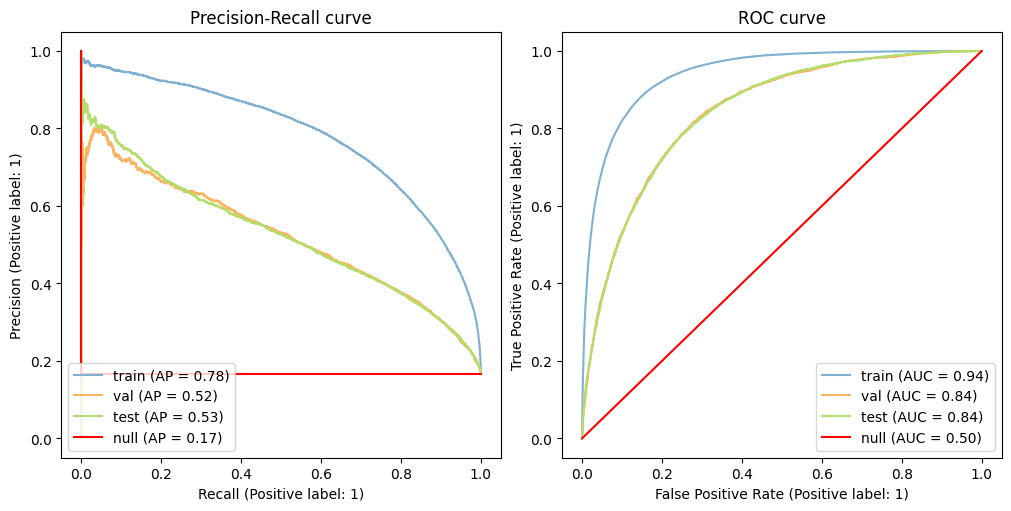

In [30]:
precision_recall_curve_plot(df_best, colors_map.colors[[4, 5, 6]])

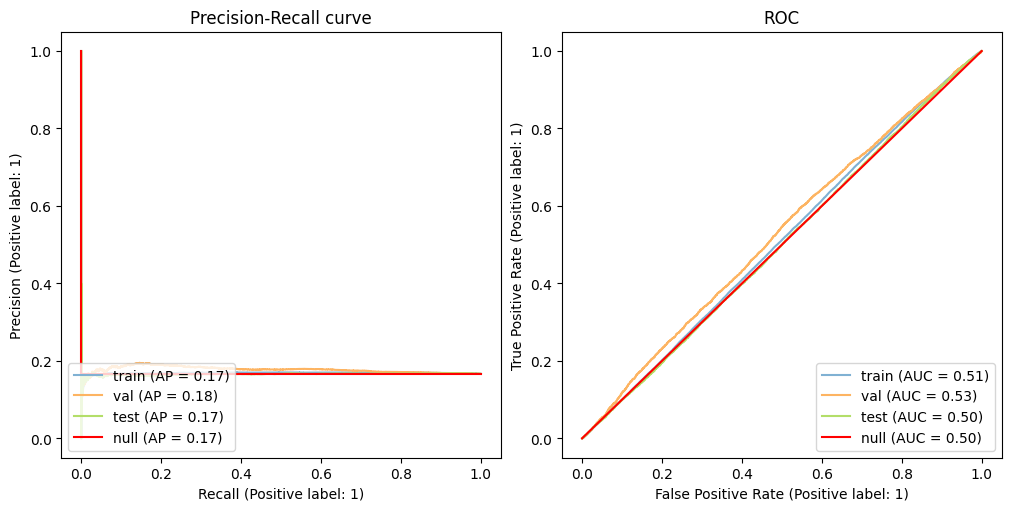

In [28]:
precision_recall_curve_plot(df_bad, colors_map.colors[[4, 5, 6]])